In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il
import os

#For comparing
old_cat_path = "../data/tng-100-1/output"


In [2]:
def create_cat(path):
    df = pd.DataFrame()
    for filename in os.listdir(path):
        temp = pd.read_pickle(path + filename)
        df_temp = pd.concat([df, temp])
        df_temp = df_temp.sort_values(by="id") 
        df = df_temp.reset_index(drop=True)
    return df

In [3]:
def masses(df):
    keys = df.keys()
    for key in keys:
        if "Mass" in key:
            df[key] = df[key]*10**10
    return df

In [4]:
def late_type_SFR(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhalosSFR"] < 0.036].index
    df_copy = df_copy.drop(index_names)
    """
    index_names_1 = df_copy[df_copy["SubhalosSFR"] > 0.36].index
    df_copy = df_copy.drop(index_names_1)
    index_names_2 = df_copy[df_copy["SubhalosSFR"] < 0.036].index
    df_copy = df_copy.drop(index_names_2)
    """
    return df_copy

def early_type_SFR(df):
    df_copy = df.copy(deep=True)
    index_names = df_copy[df_copy["SubhalosSFR"] > 0.01148].index
    df_copy = df_copy.drop(index_names)
    return df_copy

def late_type_gas(df):
    df_copy = df.copy(deep=True)
    df_copy["SubhaloGasFraction"] = df_copy["SubhaloMassGas"]/df_copy["SubhaloMassStellar"]
    index_names = df_copy[df_copy["SubhaloGasFraction"] < 0.1].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy

def early_type_gas(df):
    df_copy = df.copy(deep=True)
    df_copy["SubhaloGasFraction"] = df_copy["SubhaloMassInRadGas"]/df_copy["SubhaloMassInRadStellar"]
    index_names = df_copy[df_copy["SubhaloGasFraction"] > 0.1].index #Ferrero2020
    df_copy = df_copy.drop(index_names)
    return df_copy


In [5]:
old_cat = pd.read_pickle("../data/tng-100-3/cutdata/Subhalo_Centrals_minE9_5_SM.pkl")
old_cat_lates = late_type_gas(old_cat)
old_cat_earlies = early_type_gas(old_cat)

new_cat = pd.read_pickle("../data/tng-100-3/catalogues/kinematics_whole_failed_2302.pkl")
#new_cat = new_cat[new_cat["SubhaloMassStellar"] > 0.32]
#MAsses
old_cat = masses(old_cat)
old_cat_earlies = masses(old_cat_earlies)
old_cat_lates = masses(old_cat_lates)
new_cat = masses(new_cat)
new_cat["SubhalosSFR"] = 10**(9)*new_cat["SubhaloSFR"]/new_cat["SubhaloMassStellar"]


FileNotFoundError: [Errno 2] No such file or directory: '../data/tng-100-3/catalogues/kinematics_whole_failed_2302.pkl'

In [6]:
new_cat["SubhaloGasFraction"] = new_cat["SubhaloMassGas"]/new_cat["SubhaloMassStellar"]
#new_cat_earlies = early_type_SFR(new_cat[new_cat["SubhaloGasFraction"] < 0.1])
old_cat_earlies = early_type_SFR(old_cat_earlies)
old_cat_lates = late_type_SFR(old_cat_lates)
earlies_id = list(old_cat_earlies["id"].values)
lates_id = list(old_cat_lates["id"].values)
new_cat_earlies = new_cat[new_cat["id"].isin(earlies_id)]
earlies_new_id = list(new_cat_earlies["id"].values)
old_cat_earlies = old_cat[old_cat["id"].isin(earlies_new_id)]
new_cat_lates = new_cat[new_cat["id"].isin(lates_id)]

#early_type_SFR(new_cat[new_cat["SubhaloGasFraction"] < 0.1]) 
#new_cat_lates = late_type_SFR(new_cat[new_cat["SubhaloGasFraction"] > 0.1])

#late_type_SFR(new_cat[new_cat["SubhaloGasFraction"] > 0.1])

In [7]:
new_cat["SubhaloColor_g-i"] = new_cat["SubhaloStellarPhotometrics_g"] - new_cat["SubhaloStellarPhotometrics_i"]
new_cat_earlies["SubhaloColor_g-i"] = new_cat_earlies["SubhaloStellarPhotometrics_g"] - new_cat_earlies["SubhaloStellarPhotometrics_i"]
new_cat_lates["SubhaloColor_g-i"] = new_cat_lates["SubhaloStellarPhotometrics_g"] - new_cat_lates["SubhaloStellarPhotometrics_i"]
old_cat["SubhaloColor_g-i"] = old_cat["SubhaloStellarPhotometrics_g"] - old_cat["SubhaloStellarPhotometrics_i"]
old_cat_earlies["SubhaloColor_g-i"] = old_cat_earlies["SubhaloStellarPhotometrics_g"] - old_cat_earlies["SubhaloStellarPhotometrics_i"]
old_cat_lates["SubhaloColor_g-i"] = old_cat_lates["SubhaloStellarPhotometrics_g"] - old_cat_lates["SubhaloStellarPhotometrics_i"]

In [8]:
print("number of galaxies: SUBFIND", len(old_cat), " Particles: ", len(new_cat))
print("number of earlies: SUBFIND", len(old_cat_earlies), " Particles: ", len(new_cat_earlies))
print("number of lates: SUBFIND", len(old_cat_lates), " Particles: ", len(new_cat_lates))
print("Check: SUBFIND", len(old_cat_lates) +len(old_cat_earlies), " Particles: ", len(new_cat_lates) + len(new_cat_earlies))

number of galaxies: SUBFIND 2412  Particles:  262
number of earlies: SUBFIND 95  Particles:  95
number of lates: SUBFIND 1249  Particles:  76
Check: SUBFIND 1344  Particles:  171


In [9]:
new_cat_log = il.formatplot.log_formater(new_cat)
old_cat_log = il.formatplot.log_formater(old_cat)
new_cat_earlies_log = il.formatplot.log_formater(new_cat_earlies)
old_cat_earlies_log = il.formatplot.log_formater(old_cat_earlies)
new_cat_lates_log = il.formatplot.log_formater(new_cat_lates)
old_cat_lates_log = il.formatplot.log_formater(old_cat_lates)

No handles with labels found to put in legend.


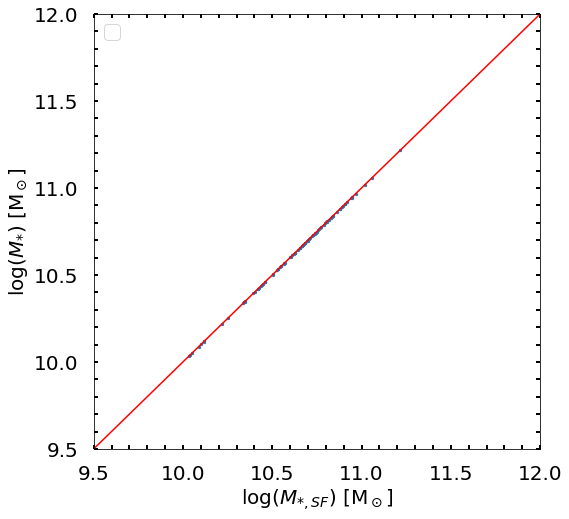

In [10]:
#Draw figure
fig1, axs1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old = old_cat_earlies_log["SubhaloMassStellar"].values
new = new_cat_earlies_log["SubhaloMassStellar"].values
x = np.linspace(0, 12)

axs1.scatter(old, new, s=5)
axs1.plot(x, x, c="red")

il.formatplot.SM_SM(ax=axs1)


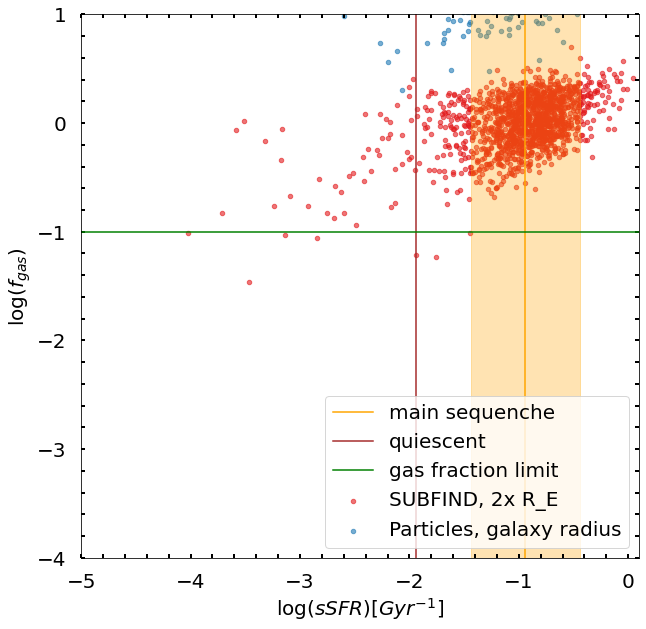

In [11]:
fig2, axs2 = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
old_cat["SubhaloGasFraction"] = old_cat["SubhaloMassInRadGas"]/old_cat["SubhaloMassInRadStellar"]
old_cat_log = il.formatplot.log_formater(old_cat)

old_cat_log.plot.scatter(y="SubhaloGasFraction", x="SubhalosSFR", color='#e31a1c', s=20, alpha=0.6, ax=axs2, label ="SUBFIND, 2x R_E")
new_cat_log.plot.scatter(y="SubhaloGasFraction", x="SubhalosSFR", color='#1f78b4', s=20, alpha=0.6, ax=axs2, label ="Particles, galaxy radius")

x_ssfr = np.array([-0.94]*50)
x_ssfr_min = np.array([-1.94]*50)
y_ssfr = np.linspace(-5,5, 50)
axs2.plot(x_ssfr, y_ssfr, c="orange", label ="main sequenche")
axs2.plot(x_ssfr_min, y_ssfr, c="brown", label ="quiescent")
axs2.fill_betweenx(y_ssfr, x_ssfr -0.5, x_ssfr +0.5, alpha=0.3, color="orange")

x_gas = np.linspace(-5,5, 50)
y_gas = [-1]*50
axs2.plot(x_gas, y_gas, c="green", label ="gas fraction limit")

il.formatplot.GF_sSFR(axs2, y0=-4, y1 = 1)
plt.show()

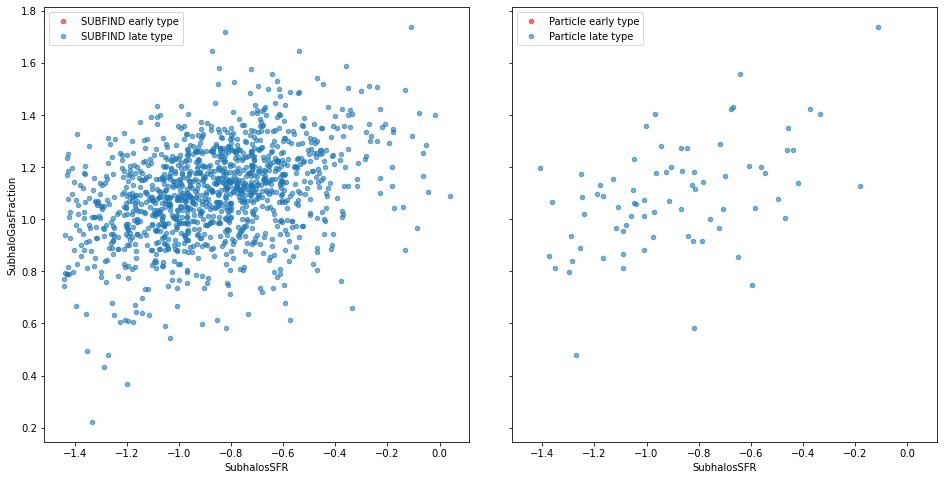

In [12]:
fig8, axs8 = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), sharey=True, sharex=True, squeeze=True)

old_cat_earlies_log.plot.scatter(y="SubhaloGasFraction", x="SubhalosSFR", color='#e31a1c', s=20, alpha=0.6, ax=axs8[0], label ="SUBFIND early type")
old_cat_lates_log.plot.scatter(y="SubhaloGasFraction", x="SubhalosSFR", color='#1f78b4', s=20, alpha=0.6, ax=axs8[0], label ="SUBFIND late type")
new_cat_earlies_log.plot.scatter(y="SubhaloGasFraction", x="SubhalosSFR", color='#e31a1c', s=20, alpha=0.6, ax=axs8[1], label ="Particle early type")
new_cat_lates_log.plot.scatter(y="SubhaloGasFraction", x="SubhalosSFR", color='#1f78b4', s=20, alpha=0.6, ax=axs8[1], label ="Particle late type")

fig8.subplots_adjust(hspace=0, wspace=0.1)

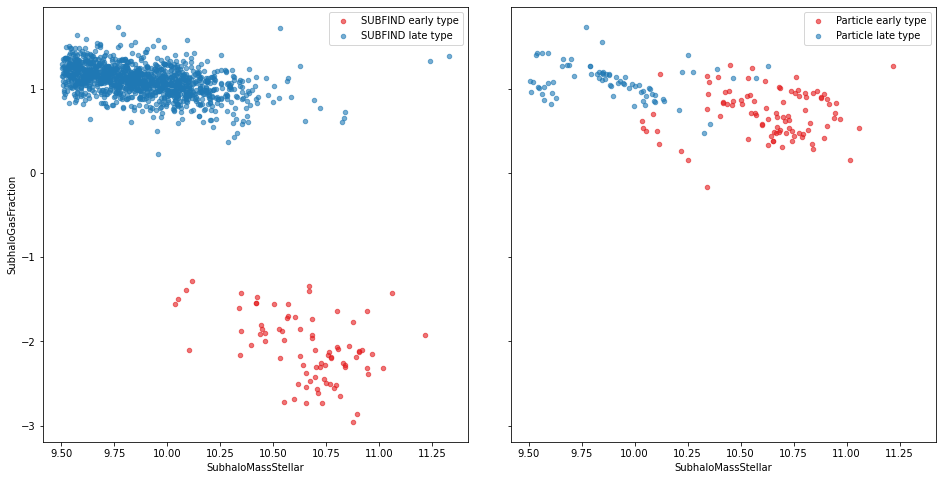

In [13]:
fig9, axs9 = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), sharey=True, sharex=True, squeeze=True)

old_cat_earlies_log.plot.scatter(y="SubhaloGasFraction", x="SubhaloMassStellar", color='#e31a1c', s=20, alpha=0.6, ax=axs9[0], label ="SUBFIND early type")
old_cat_lates_log.plot.scatter(y="SubhaloGasFraction", x="SubhaloMassStellar", color='#1f78b4', s=20, alpha=0.6, ax=axs9[0], label ="SUBFIND late type")
new_cat_earlies_log.plot.scatter(y="SubhaloGasFraction", x="SubhaloMassStellar", color='#e31a1c', s=20, alpha=0.6, ax=axs9[1], label ="Particle early type")
new_cat_lates_log.plot.scatter(y="SubhaloGasFraction", x="SubhaloMassStellar", color='#1f78b4', s=20, alpha=0.6, ax=axs9[1], label ="Particle late type")

fig9.subplots_adjust(hspace=0, wspace=0.1)

In [14]:
print(new_cat.keys())

Index(['id', 'SubhaloGalaxyRad', 'SubhaloRad', 'SubhaloMass200', 'SubhaloPosX',
       'SubhaloPosY', 'SubhaloPosZ', 'SubhaloVelX', 'SubhaloVelY',
       'SubhaloVelZ', 'SubhaloSFR', 'SubhaloMassGas', 'SubhaloMassDM',
       'SubhaloMassStellar', 'SubhaloMass', 'SubhaloHalfmassRadStellar',
       'SubhaloMassInHalfRadGas', 'SubhaloMassInHalfRadDM',
       'SubhaloMassInHalfRadStellar', 'SubhaloMassInHalfRad',
       'SubhaloMassInRadGas', 'SubhaloMassInRadDM', 'SubhaloMassInRadStellar',
       'RotationAxisX', 'RotationAxisY', 'RotationAxisZ',
       'SubhaloRotVel_2_2Re', 'SubhaloHalfmassRad_xy', 'SubhaloHalfmassRad_xz',
       'SubhaloHalfmassRad_yz', 'SubhaloVelDisp',
       'SubhaloStellarPhotometrics_g', 'SubhaloStellarPhotometrics_i',
       'SubhaloColor_g-i', 'SubhalosSFR', 'SubhaloGasFraction'],
      dtype='object')


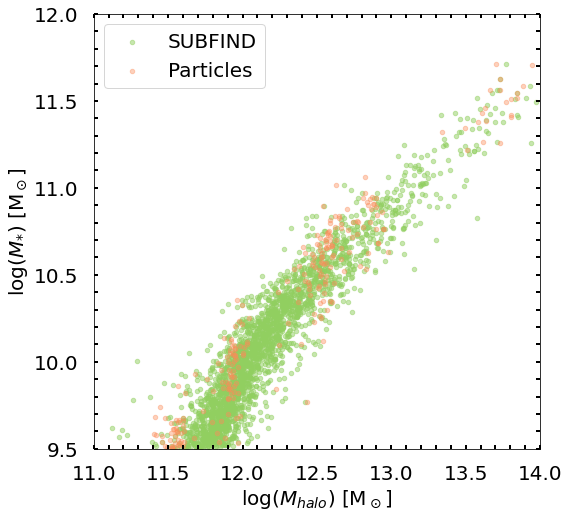

In [15]:
#Draw figure
fig3, axs3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_cat_log.plot.scatter(x="SubhaloMass", y = "SubhaloMassStellar",s=20, label="SUBFIND",  alpha=0.5, color="#91cf60", ax = axs3)
new_cat_log.plot.scatter(x="SubhaloMass200", y="SubhaloMassStellar",s=20, label="Particles", alpha=0.4, color="#fc8d59", ax = axs3)

il.formatplot.HM_SM(ax = axs3, y0=9.5, x0 =11, x1=14)

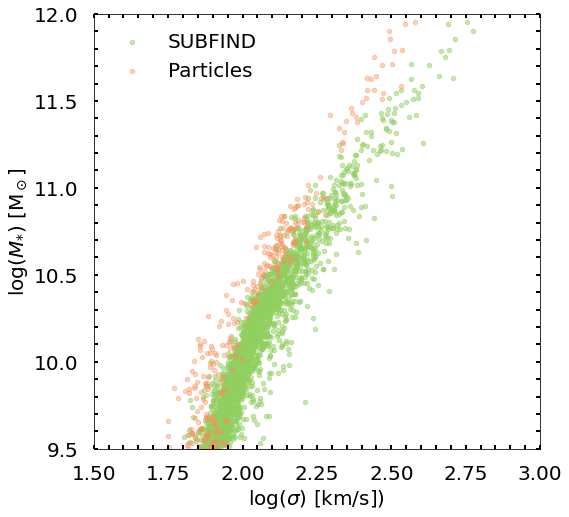

In [16]:
#Draw figure
fig3, axs3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_cat_log.plot.scatter(x="SubhaloVelDisp", y = "SubhaloMassStellar",s=20, label="SUBFIND",  alpha=0.5, color="#91cf60", ax = axs3)
new_cat_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar",s=20, label="Particles", alpha=0.4, color="#fc8d59", ax = axs3)

il.formatplot.VD_SM(ax = axs3, y0=9.5)

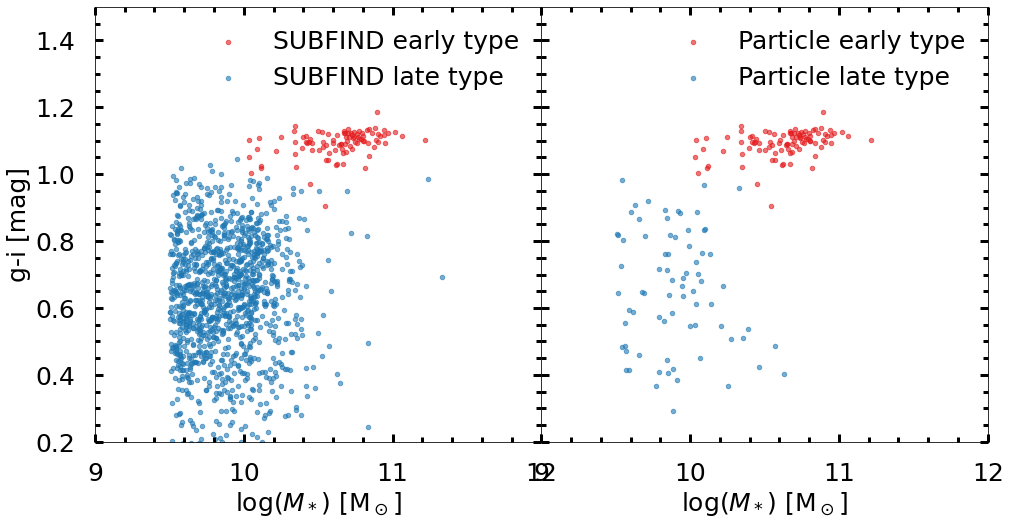

In [17]:
fig5, axs5 = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), sharey=True, sharex=True, squeeze=True)

old_cat_earlies_log.plot.scatter(x="SubhaloMassStellar", y="SubhaloColor_g-i", color='#e31a1c', s=20, alpha=0.6, ax=axs5[0], label ="SUBFIND early type")
old_cat_lates_log.plot.scatter(x="SubhaloMassStellar", y="SubhaloColor_g-i", color='#1f78b4', s=20, alpha=0.6, ax=axs5[0], label ="SUBFIND late type")
new_cat_earlies_log.plot.scatter(x="SubhaloMassStellar", y="SubhaloColor_g-i", color='#e31a1c', s=20, alpha=0.6, ax=axs5[1], label ="Particle early type")
new_cat_lates_log.plot.scatter(x="SubhaloMassStellar", y="SubhaloColor_g-i", color='#1f78b4', s=20, alpha=0.6, ax=axs5[1], label ="Particle late type")

il.formatplot.C_SM(color="g-i", ax=axs5[1], y0=0.2, y1=1.5)
il.formatplot.C_SM(color="g-i", ax=axs5[0], y0=0.2, y1=1.5)
fig5.subplots_adjust(hspace=0, wspace=0)

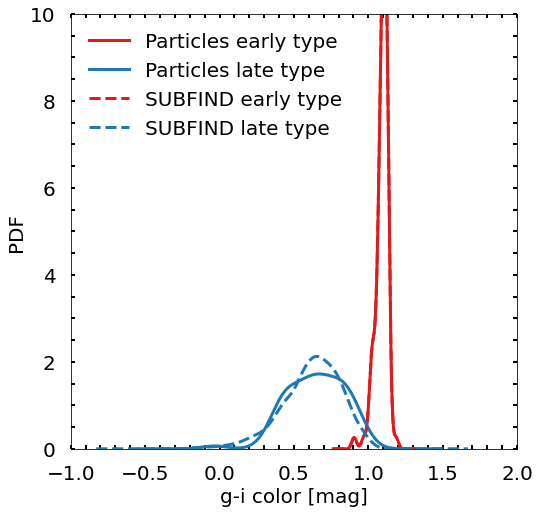

In [18]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ser1, ser2 = new_cat_earlies["SubhaloColor_g-i"], new_cat_lates["SubhaloColor_g-i"]
ser3, ser4 = old_cat_earlies["SubhaloColor_g-i"], old_cat_lates["SubhaloColor_g-i"]
ser1.plot.kde(ax=ax3, color = '#e31a1c', linewidth=3, label="Particles early type")
ser2.plot.kde(ax=ax3, color = '#1f78b4', linewidth=3, label="Particles late type")
ser3.plot.kde(ax=ax3, label="SUBFIND early type", color = '#e31a1c', linewidth=3, linestyle="--")
ser4.plot.kde(ax=ax3, label="SUBFIND late type", color = '#1f78b4', linewidth=3, linestyle="--")
il.formatplot.PDF_C('g-i', ax3, legend_on=True, y1=10)


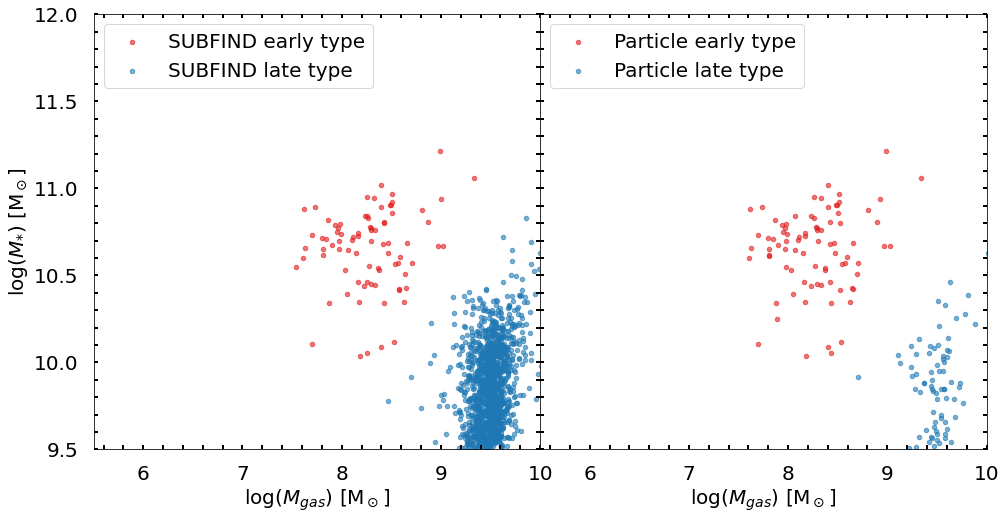

In [19]:
fig6, axs6 = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), sharey=True, sharex=True, squeeze=True)

old_cat_earlies_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassInHalfRadGas", color='#e31a1c', s=20, alpha=0.6, ax=axs6[0], label ="SUBFIND early type")
old_cat_lates_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassInHalfRadGas", color='#1f78b4', s=20, alpha=0.6, ax=axs6[0], label ="SUBFIND late type")
new_cat_earlies_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassInHalfRadGas", color='#e31a1c', s=20, alpha=0.6, ax=axs6[1], label ="Particle early type")
new_cat_lates_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassInHalfRadGas", color='#1f78b4', s=20, alpha=0.6, ax=axs6[1], label ="Particle late type")

il.formatplot.GM_SM(ax = axs6[0], y0=9.5)
il.formatplot.GM_SM(ax = axs6[1], y0=9.5)
fig6.subplots_adjust(hspace=0, wspace=0)

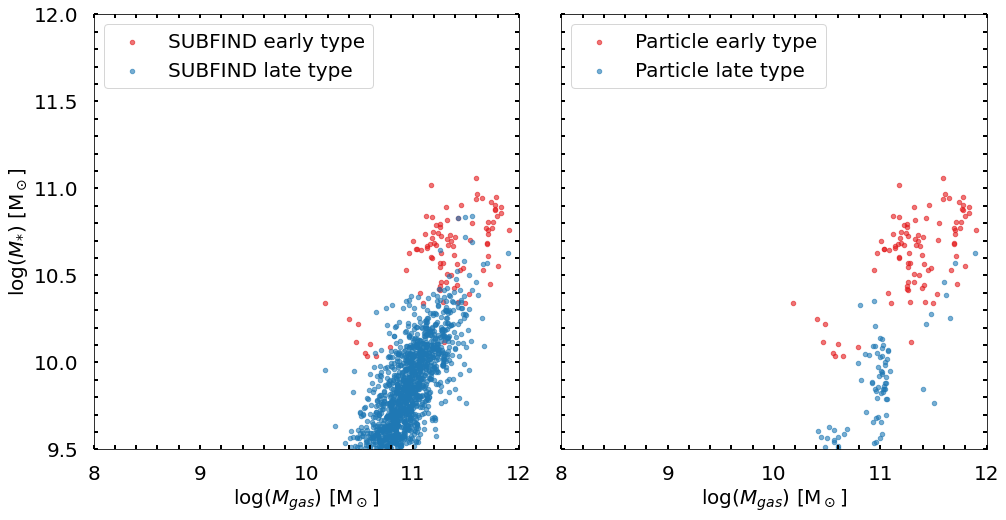

In [20]:
fig7, axs7 = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), sharey=True, sharex=True, squeeze=True)

old_cat_earlies_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassGas", color='#e31a1c', s=20, alpha=0.6, ax=axs7[0], label ="SUBFIND early type")
old_cat_lates_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassGas", color='#1f78b4', s=20, alpha=0.6, ax=axs7[0], label ="SUBFIND late type")
new_cat_earlies_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassGas", color='#e31a1c', s=20, alpha=0.6, ax=axs7[1], label ="Particle early type")
new_cat_lates_log.plot.scatter(y="SubhaloMassStellar", x="SubhaloMassGas", color='#1f78b4', s=20, alpha=0.6, ax=axs7[1], label ="Particle late type")

il.formatplot.GM_SM(ax = axs7[0], y0=9.5, x0=8, x1=12)
il.formatplot.GM_SM(ax = axs7[1], y0=9.5, x0=8, x1=12)
fig7.subplots_adjust(hspace=0, wspace=0.1)